In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import string

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('m_train.csv')

In [3]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [5]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

<AxesSubplot:>

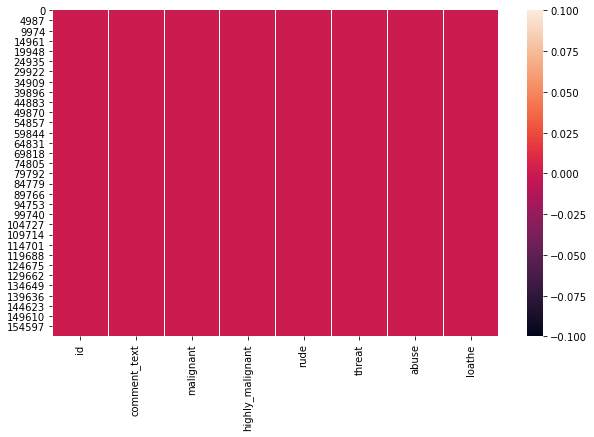

In [6]:
#making heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [7]:
#checking number of values in the dataset
data_count = df.iloc[:,2:].sum()
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

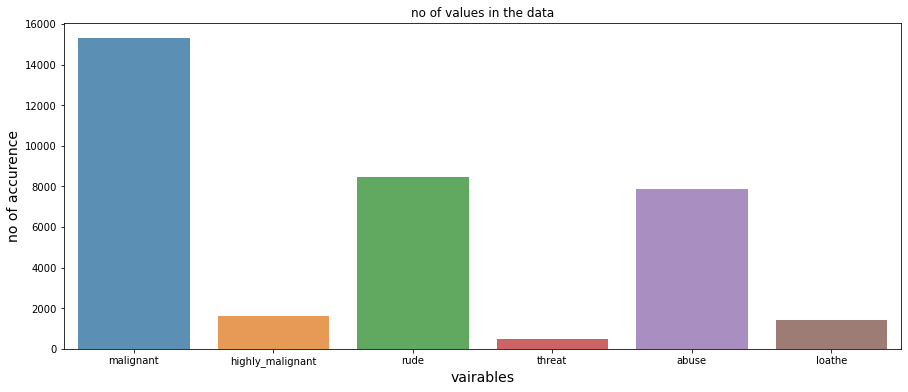

In [8]:
#making barplot for number of values in the data frame
plt.figure(figsize=(15,6))
sns.barplot(data_count.index, data_count.values, alpha=0.8)
plt.title('no of values in the data')
plt.ylabel('no of accurence',fontsize=14)
plt.xlabel('vairables',fontsize = 14)

plt.show

we can see maximum comments are malignant some are related with nudety and abuse. there are one few comments which are inccludes threat, loathe and are highly malingnant.

In [9]:
num_rows= len(df)
print(num_rows)

159571


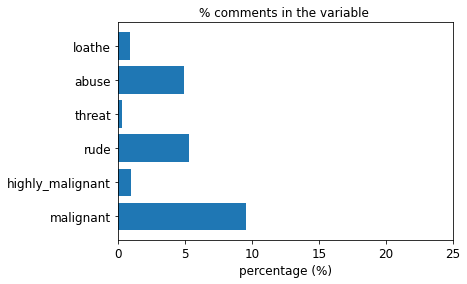

In [10]:
#creat a bar graph
sum_malig = df['malignant'].sum()/num_rows*100
sum_highml= df['highly_malignant'].sum()/num_rows*100
sum_rude=df['rude'].sum()/num_rows*100
sum_threat=df['threat'].sum()/num_rows*100
sum_abuse=df['abuse'].sum()/num_rows*100
sum_loathe=df['loathe'].sum()/num_rows*100
ind= np.arange(6)
ax= plt.barh(ind,[sum_malig, sum_highml, sum_rude, sum_threat, sum_abuse, sum_loathe])

plt.xlabel("percentage (%)",size=12)
plt.xticks(np.arange(0,30,5),size=12)
plt.title('% comments in the variable ',size=12)
plt.yticks(ind,('malignant','highly_malignant','rude','threat','abuse','loathe'),size=12);

In [11]:
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [12]:
df['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [13]:
# removing the extra unneccessory characters from the comments
import nltk
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
alphas = lambda x: re.sub('w*\d\w*',' ',x)
lower = lambda x: re.sub( re.escape(string.punctuation),' ',x.lower())
remove_n = lambda x: re.sub('\n',' ', x)
remove_non = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)

In [15]:
df['comment_text']=df['comment_text'].map(alphas).map(lower).map(remove_n).map(remove_non)

In [16]:
df['comment_text'][0]

"explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now. . . . "

# now checking the comment category in all the categories

In [17]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [18]:
df_malig = df.loc[:,['id','comment_text','malignant']]

In [19]:
df_malig['comment_text'][0]

"explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now. . . . "

In [20]:
df_highml = df.loc[:,['id','comment_text','highly_malignant']]

In [21]:
df_rude = df.loc[:,['id','comment_text','rude']]

In [22]:
df_threat = df.loc[:,['id','comment_text','threat']]

In [23]:
df_abuse = df.loc[:,['id','comment_text','abuse']]

In [24]:
df_loathe = df.loc[:,['id','comment_text','loathe']]

# now we create the word cloud

In [29]:
!pip install wordcloud

In [32]:
import wordcloud
from PIL import Image
from wordcloud import wordcloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [34]:
def wordcloud(df,label):
    subset = df[df[label]==1]
    text = subset.comment_text.values
    wc = WordCloud(background_color = 'black',max_words=5000)
    wc.generate(" ",join(text))
    
    plt.figure(figsize=(8,5))
    plt.subplot(221)
    plt.title('words frequented in the list',format(label),fontsize=12)
    plt.imshow(wc.recolor(colormap='gist_earth',random_state  = 250,alpha = 0.95))

In [40]:
wordcloud(df_loathe,'loathe')

NameError: name 'WordCloud' is not defined